# Data Analysis With Python


Import the libraries that will be used

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
In this Data Gathering section, we will use the Bike Sharing Dataset which can be downloaded from the following link : https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

The following are the columns found in the dataset

In [25]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


From the table above, we can see that the difference between the day table and the hour table is that the hour table has an 'hr' column, while the day table does not.

### Assessing Data
In this section, we will assess the quality of all the data that will be used

In [27]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


There are no issues with these data types except for dteday. dteday should be of datetime type. For season and weathersit, which are integers, it's likely that each number represents a different situation

In [28]:
print("Duplicate Count: ",day_df.duplicated().sum())
day_df.describe()

Duplicate Count:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


There are no duplications in day_df. Based on the information available, for season 1 = spring, 2 = summer, 3 = fall, 4 = winter. For yr, 1 = 2011, 2 = 2012. For weathersit, 1 = Clear, Few clouds, Partly cloudy, Partly cloudy, 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4 = Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog.

In [29]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


The hour_df dataset is exactly the same as the day_df dataset except that the hour_df dataset includes an 'hr' column.

In [30]:
print("Duplicate count: ",day_df.duplicated().sum())
hour_df.describe()

Duplicate count:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


There are no duplications in hour_df.

### Data Cleansing

The existing data is already quite clean, so we can proceed to the next stage, which is EDA (Exploratory Data Analysis).

## Exploratory Data Analysis (EDA)


### Business Questions
1. Is there a relationship between the seasons and the daily bike rental numbers?
2. Does the weather affect the number of bike rentals each day?
3. Is there a difference in the number of rentals between workdays and holidays?


### Exploring Data

### Data Exploration on bike_rent_df

To obtain more information related to both datasets, we can combine them through a join process.

In [31]:
bike_rent_df = pd.merge(
    left=day_df,
    right=hour_df,
    how='left',
    left_on='dteday',
    right_on='dteday'
)
bike_rent_df = bike_rent_df.rename(columns={'instant_x':'instant_day', 'instant_y':'instant_hour','season_x' : 'season_day','season_y' : 'season_hour', 'yr_x':'yr_day', 'yr_y':'yr_hour', 'mnth_x':'mnth_day', 'mnth_y':'mnth_hour', 'holiday_x':'holiday_day', 'holiday_y':'holiday_hour', 'weekday_x':'weekday_day', 'weekday_y':'weekday_hour', 'workingday_x':'workingday_day', 'workingday_y':'workingday_hour', 'weathersit_x':'weathersit_day', 'weathersit_y':'weathersit_hour', 'temp_x':'temp_day', 'temp_y':'temp_hour', 'atemp_x':'atemp_day', 'atemp_y':'atemp_hour', 'hum_x':'hum_day', 'hum_y':'hum_hour', 'windspeed_x':'windspeed_day', 'windspeed_y':'windspeed_hour', 'casual_x':'casual_day', 'casual_y':'casual_hour', 'registered_x':'registered_day', 'registered_y':'registered_hour', 'cnt_x':'cnt_day', 'cnt_y':'cnt_hour'})

pd.set_option('display.max_columns', 100)
bike_rent_df.describe(include="all", )

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,instant_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [32]:
bike_rent_df.groupby(by='season_hour').agg({
    'workingday_hour':'count',
    'windspeed_hour':["max","min","mean", lambda x : x.max() - x.min()],
}).sort_values(by=("workingday_hour", "count"), ascending=False)

workingday_hour windspeed_hour                          
                      count            max  min      mean <lambda_0>
season_hour                                                         
3                      4496         0.8507  0.0  0.171593     0.8507
2                      4409         0.7164  0.0  0.203410     0.7164
1                      4242         0.8060  0.0  0.215107     0.8060
4                      4232         0.6418  0.0  0.170819     0.6418


From the above data, we can see that the fastest windspeed_hour occurs when season_hour = 3, which is during the fall season, while the highest average windspeed_hour occurs when season_hour = 1, which is during spring.

In [33]:
bike_rent_df.groupby(by='season_day').agg({
    'workingday_day':'count',
    'windspeed_day':["max","min","mean", lambda x : x.max() - x.min()],
}).sort_values(by=("workingday_day", "count"), ascending=False)

workingday_day windspeed_day                               
                    count           max       min      mean <lambda_0>
season_day                                                            
3                    4496      0.375617  0.064071  0.171593   0.311546
2                    4409      0.388067  0.065929  0.203410   0.322138
1                    4242      0.507463  0.045408  0.215107   0.462055
4                    4232      0.422275  0.022392  0.170819   0.399883

From the data above, we can see that the fastest windspeed_day occurs when season_day = 1, which is during the spring season. Additionally, the highest average windspeed_day also occurs in season_day = 1, during spring. The largest range is also found in season_day = 1, which is during the spring season.

In [34]:
bike_rent_df.groupby(by="season_day").mnth_day .nunique()

season_day
1    4
2    4
3    4
4    4
Name: mnth_day, dtype: int64


The distribution of seasons for each month is evenly spread with each season lasting for 4 months.

In [35]:
bike_rent_df.groupby(by="season_day").instant_day .nunique()

season_day
1    181
2    184
3    188
4    178
Name: instant_day, dtype: int64


Bike rentals for each season are also evenly distributed, with a range from 178 to 188.

In [36]:
bike_rent_df.groupby(by="season_day").cnt_day .nunique()

season_day
1    179
2    182
3    188
4    176
Name: cnt_day, dtype: int64

The bike rentals for count and instant show a slight difference. This may occur because, in the case of instant, a person renting a bike more than once a day is counted each time, whereas in the case of count, if a person rents more than once in a day, it is still counted as a single rental.

In [37]:
bike_rent_df.groupby(by="season_day").cnt_hour.nunique()

season_day
1    482
2    721
3    760
4    690
Name: cnt_hour, dtype: int64

The highest bike rentals per hour occur when season_day = 3, which corresponds to the fall season.

In [38]:
bike_rent_df.groupby(by="weathersit_day").cnt_hour.nunique()

weathersit_day
1    841
2    686
3    187
Name: cnt_hour, dtype: int64

The highest hourly bike rentals occur when weathersit = 1, which corresponds to clear weather conditions, including few clouds and partly cloudy skies. Conversely, when weathersit = 4, which signifies heavy rain with ice pellets, thunderstorms, mist, snow, and fog, there are no bike rentals.

In [39]:
bike_rent_df.groupby(by="weathersit_day").cnt_day.nunique()

weathersit_day
1    451
2    243
3     21
Name: cnt_day, dtype: int64

Similar to the explanation above, however, this data represents daily bike rentals, whereas the previous data referred to hourly bike rentals.

In [40]:
numerical_columns = ["holiday_day" 
 ,"weekday_day","workingday_day","weathersit_day","temp_day","atemp_day","season_day", "windspeed_day",  "cnt_day"]
correlation = bike_rent_df[numerical_columns].corr()
print(correlation)

                holiday_day  weekday_day  workingday_day  weathersit_day  \
holiday_day        1.000000    -0.102088       -0.252471       -0.033653   
weekday_day       -0.102088     1.000000        0.035955        0.035082   
workingday_day    -0.252471     0.035955        1.000000        0.057122   
weathersit_day    -0.033653     0.035082        0.057122        1.000000   
temp_day          -0.028856    -0.001894        0.058460       -0.119714   
atemp_day         -0.032770    -0.009333        0.057839       -0.120853   
season_day        -0.009585    -0.002335        0.013743        0.014940   
windspeed_day      0.006319     0.018226       -0.018746        0.028187   
cnt_day           -0.070344     0.064204        0.068216       -0.289650   

                temp_day  atemp_day  season_day  windspeed_day   cnt_day  
holiday_day    -0.028856  -0.032770   -0.009585       0.006319 -0.070344  
weekday_day    -0.001894  -0.009333   -0.002335       0.018226  0.064204  
workingday_day

From the data above, we can observe that the number of bike rentals (cnt_day) has a negative relationship with holiday_day, weathersit_day, and windspeed_day. The more _holiday_day_s there are, the worse the weathersit_day becomes (indicated by weathersit_day approaching the number 4), and the stronger the windspeed_day, the fewer the number of bike renters.

## Data Visualization and Answering Business Questions

### 1.  Is there a relationship between the seasons and the daily bike rental numbers?


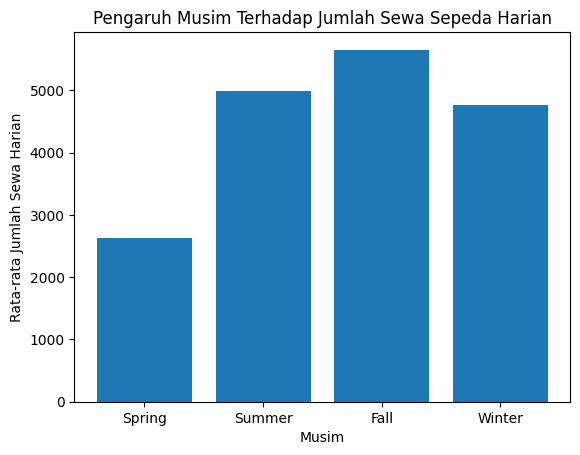

In [41]:
musim_sewa = bike_rent_df.groupby('season_day')['cnt_day'].mean()
musim = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(musim, musim_sewa)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Pengaruh Musim Terhadap Jumlah Sewa Sepeda Harian')
plt.show()

Based on the graph mentioned, the answer to the question "Is there a relationship between the seasons and the daily bike rental numbers?" is yes. The bike rentals are highest during the Fall season.

### 2. Does the weather affect the number of bike rentals each day?

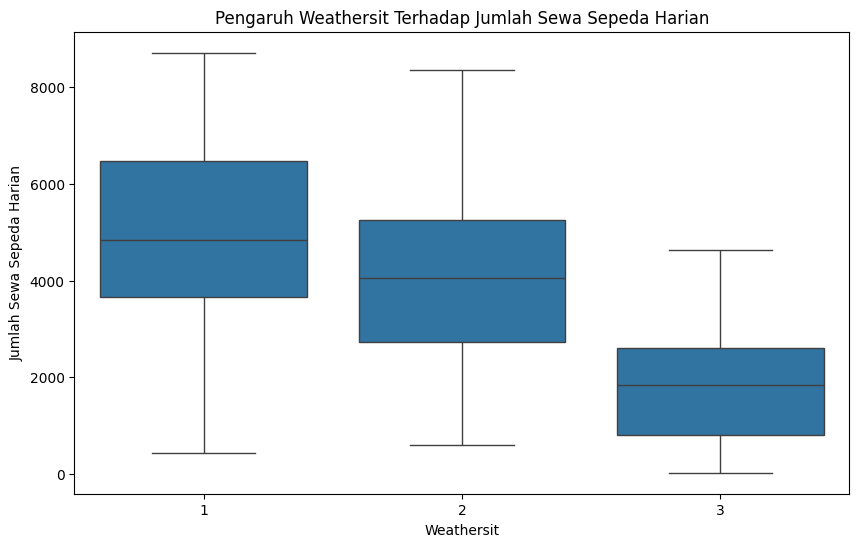

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="weathersit_day", y="cnt_day", data=bike_rent_df)
plt.title("Pengaruh Weathersit Terhadap Jumlah Sewa Sepeda Harian")
plt.xlabel("Weathersit")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()


Based on the graph mentioned, the answer to the question "Does the weather affect the number of bike rentals each day?" is yes. The bike rentals are highest when weathersit = 1, which corresponds to clear weather conditions such as clear skies, few clouds, and partly cloudy weather.

### 3. Is there a difference in the number of rentals between workdays and holidays?


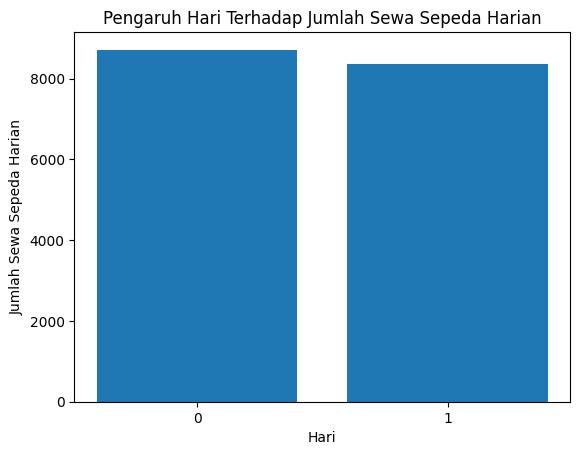

In [43]:
plt.bar(bike_rent_df['workingday_day'], bike_rent_df['cnt_day'])
plt.xlabel('Hari')
plt.ylabel('Jumlah Sewa Sepeda Harian')
plt.title('Pengaruh Hari Terhadap Jumlah Sewa Sepeda Harian')
plt.xticks([0, 1], ['0', '1'])
plt.show()


Based on the graph mentioned, the answer to the question "Is there a difference in the number of rentals between workdays and holidays?" is yes. When the workingday = 1, which is a weekday, there are fewer bike rentals. This could be because most people use private vehicles for commuting on workdays. Conversely, when it's not a weekday (workingday = 0), which is during holidays or weekends, more people rent bikes. This could be because many people use bicycles for recreational activities or exercise during their free time.

## Kesimpulan

### 1. Is there a relationship between the seasons and the daily bike rental numbers?


Yes, the highest number of bike rentals occurs during the fall season.

### 2. Does the weather affect the number of bike rentals each day?


Yes, the highest number of bike rentals occurs when the weather is clear, with few clouds or partly cloudy conditions.

### 3. Is there a difference in the number of rentals between workdays and holidays?




When it's a workday, there are fewer people renting bicycles. This may be because most people use their private vehicles for commuting. On the other hand, during the weekends or holidays, many people rent bicycles. This is likely because most people use bicycles for exercise.

In [44]:
bike_rent_df.to_csv("bike_rent.csv", index=False)